# Exercise 5 - Data Preperation

## Project Imports

In [0]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import scipy as sp
import pylab as P
import random

In [70]:
!pip install knnimpute

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Load the New Election data

##  First run "!ls" command to check if it's already in the vm

In [72]:
!mkdir BAK
!cp *.csv BAK/
!rm *.csv
!ls

mkdir: cannot create directory ‘BAK’: File exists
BAK  datalab


## Download the train dataset from the cloud storage

In [0]:
downloaded = drive.CreateFile({'id': '1OU3EKoPw42LqrqLKfDpKoTXA-MYCiJX_'})
downloaded.GetContentFile('ElectionsData_Pred_Features.csv')

In [74]:
!ls

BAK  datalab  ElectionsData_Pred_Features.csv


In [0]:
election_data = pd.read_csv("ElectionsData_Pred_Features.csv", header=0)

## Data Exploration

In [257]:
election_data.head(5)

,IdentityCard_Num,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Most_Important_Issue,Avg_Satisfaction_with_previous_vote,Looking_at_poles_results,Garden_sqr_meter_per_person_in_residancy_area,Married,Gender,...,Last_school_grades,Age_group,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Main_transportation,Occupation,Overall_happiness_score,Num_of_kids_born_last_10_years,Financial_agenda_matters
0,1,7.0,582.651672,66991.659036,Healthcare,194.217224,No,344.931606,Yes,Male,...,80.0,30-45,1.0,625.634107,8.0,Public_or_other,Hightech,431.549112,1.0,Yes
1,2,10.0,537.035136,63581.712944,Military,179.011712,No,355.181861,Yes,Male,...,30.0,Below_30,1.0,654.399891,6.0,Motorcycle_or_truck,Services_or_Retail,409.504666,1.0,Yes
2,3,2.0,1177.671432,135095.166133,Environment,392.557144,Yes,344.141403,Yes,Male,...,90.0,30-45,4.0,847.663392,14.0,Car,Industry_or_other,549.970750,0.0,Yes
3,4,5.0,153.925755,17691.033625,Financial,51.308585,No,344.796755,Yes,Male,...,60.0,30-45,1.0,604.064140,5.0,Public_or_other,Services_or_Retail,426.148106,2.0,No
4,5,5.0,-138.081083,-7442.378739,Environment,-46.027028,Yes,161.695836,Yes,Male,...,90.0,30-45,2.0,821.153302,15.0,Public_or_other,Public_Sector,615.907352,0.0,Yes


In [258]:
election_data.dtypes

IdentityCard_Num                                   int64
Occupation_Satisfaction                          float64
Avg_monthly_expense_when_under_age_21            float64
AVG_lottary_expanses                             float64
Most_Important_Issue                              object
Avg_Satisfaction_with_previous_vote              float64
Looking_at_poles_results                          object
Garden_sqr_meter_per_person_in_residancy_area    float64
Married                                           object
Gender                                            object
Voting_Time                                       object
Financial_balance_score_.0.1.                    float64
X.Of_Household_Income                            float64
Avg_government_satisfaction                      float64
Avg_education_importance                         float64
Avg_environmental_importance                     float64
Avg_Residancy_Altitude                           float64
Yearly_ExpensesK               

In [259]:
election_data.describe()

,IdentityCard_Num,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Financial_balance_score_.0.1.,X.Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,...,Avg_size_per_room,Weighted_education_rank,X._satisfaction_financial_policy,Avg_monthly_income_all_years,Last_school_grades,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Overall_happiness_score,Num_of_kids_born_last_10_years
count,10000.00000,9944.000000,9935.000000,9951.000000,9930.000000,9941.000000,9938.000000,9942.000000,9936.000000,9934.000000,...,9937.000000,9936.000000,9932.000000,9936.000000,9925.000000,9934.000000,9943.000000,9929.000000,9937.000000,9925.000000
mean,5000.50000,5.531376,505.998923,68755.239663,168.550741,412.560822,0.498689,0.499769,4.980705,5.016348,...,20.692249,205.153477,49.966199,49580.231521,72.837280,2.001007,671.019263,9.660288,474.314407,0.664282
std,2886.89568,2.864049,432.341238,70172.943560,144.040190,135.629175,0.289392,0.287132,2.886140,2.883037,...,2.850650,109.418043,29.008778,85147.494780,20.308241,1.253927,126.447079,2.757766,108.879774,1.047991
min,1.00000,1.000000,-760.581980,-153663.209748,-253.527327,0.935073,0.000297,0.000056,0.000214,0.000159,...,1.242612,5.855398,0.004262,9.751126,30.000000,0.000000,49.850510,5.000000,0.174146,0.000000
25%,2500.75000,3.000000,198.987026,25323.714338,66.288574,316.627960,0.247393,0.250963,2.445209,2.549850,...,19.478478,126.969613,24.852723,4622.859358,60.000000,1.000000,596.080915,8.000000,413.332738,0.000000
50%,5000.50000,6.000000,385.874725,49128.853934,128.606860,397.211181,0.497605,0.500869,5.015930,5.052688,...,20.666700,202.050611,49.587589,16832.901706,70.000000,2.000000,663.039829,9.000000,472.642204,0.000000
75%,7500.25000,8.000000,694.844597,87737.778185,231.159661,485.704871,0.748513,0.746006,7.483365,7.495372,...,22.045722,257.734904,75.381370,54058.397064,90.000000,3.000000,731.554884,12.000000,530.001654,1.000000
max,10000.00000,10.000000,2297.295696,568994.981131,765.765232,826.628682,0.999697,0.999984,9.997253,9.999821,...,26.984359,805.916767,99.996539,587172.155862,100.000000,7.000000,1069.941023,16.000000,772.526144,10.000000


In [260]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
IdentityCard_Num                                 10000 non-null int64
Occupation_Satisfaction                          9944 non-null float64
Avg_monthly_expense_when_under_age_21            9935 non-null float64
AVG_lottary_expanses                             9951 non-null float64
Most_Important_Issue                             9964 non-null object
Avg_Satisfaction_with_previous_vote              9930 non-null float64
Looking_at_poles_results                         9972 non-null object
Garden_sqr_meter_per_person_in_residancy_area    9941 non-null float64
Married                                          9970 non-null object
Gender                                           9974 non-null object
Voting_Time                                      9973 non-null object
Financial_balance_score_.0.1.                    9938 non-null float64
X.Of_Household_Income                         

# Identify the correct type of each attribute

Attribute: IdentityCard_Num (int64)
Mean: 5000.5
Standard Deviation: 2886.8956799071675


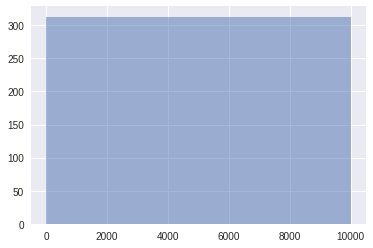

Attribute: Occupation_Satisfaction (float64)
Mean: 5.531375703942076
Standard Deviation: 2.864049040502538


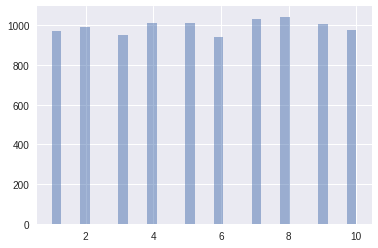

Attribute: Avg_monthly_expense_when_under_age_21 (float64)
Mean: 505.99892256070785
Standard Deviation: 432.3412377436554


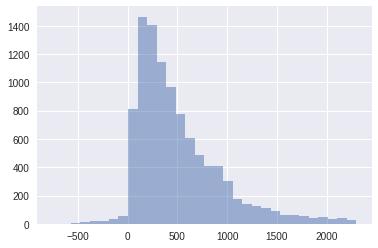

Attribute: AVG_lottary_expanses (float64)
Mean: 68755.23966310582
Standard Deviation: 70172.94356027304


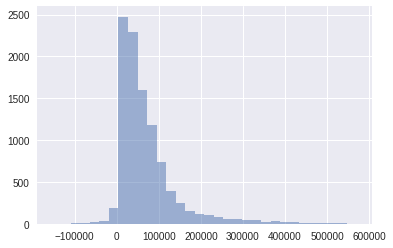

Attribute: Avg_Satisfaction_with_previous_vote (float64)
Mean: 168.5507410050213
Standard Deviation: 144.0401897512858


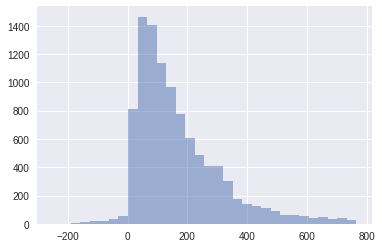

Attribute: Garden_sqr_meter_per_person_in_residancy_area (float64)
Mean: 412.56082213454107
Standard Deviation: 135.62917518741975


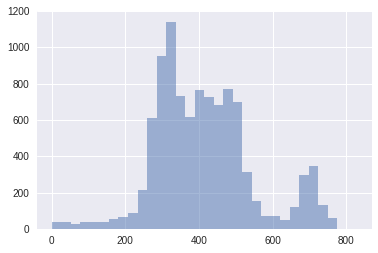

Attribute: Financial_balance_score_.0.1. (float64)
Mean: 0.49868887197373885
Standard Deviation: 0.2893923797732967


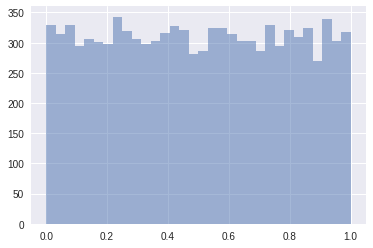

Attribute: X.Of_Household_Income (float64)
Mean: 0.49976876999713926
Standard Deviation: 0.2871320374202555


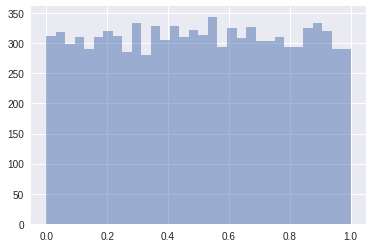

Attribute: Avg_government_satisfaction (float64)
Mean: 4.980704727726137
Standard Deviation: 2.8861400181921133


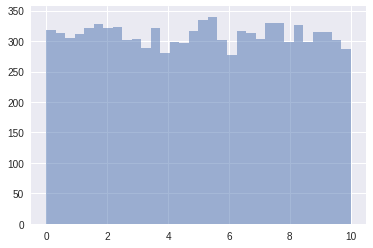

Attribute: Avg_education_importance (float64)
Mean: 5.01634751920855
Standard Deviation: 2.8830374250468904


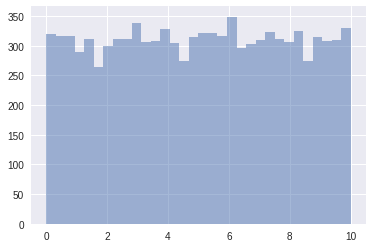

Attribute: Avg_environmental_importance (float64)
Mean: 5.052991142000633
Standard Deviation: 2.8713733258363208


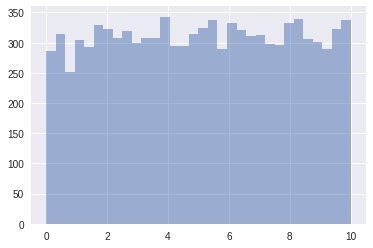

Attribute: Avg_Residancy_Altitude (float64)
Mean: 4.980524202116098
Standard Deviation: 2.8727582855088905


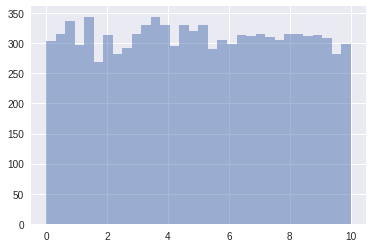

Attribute: Yearly_ExpensesK (float64)
Mean: 6515.348228663446
Standard Deviation: 2033.0516061648616


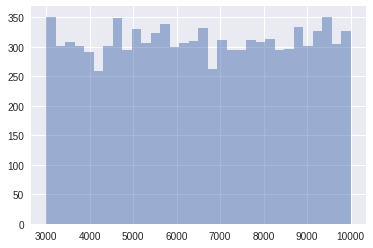

Attribute: X.Time_invested_in_work (float64)
Mean: 49.98012864135028
Standard Deviation: 28.723427913810003


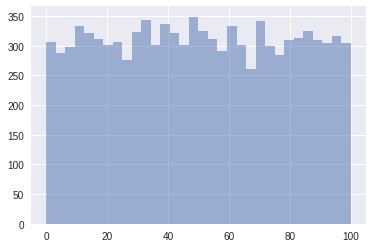

Attribute: Yearly_IncomeK (float64)
Mean: 436.1182572831438
Standard Deviation: 106.68972903287845


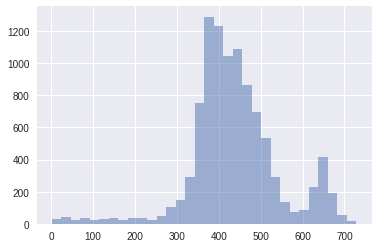

Attribute: Avg_monthly_expense_on_pets_or_plants (float64)
Mean: 4995.2614436176145
Standard Deviation: 1448.2658916775886


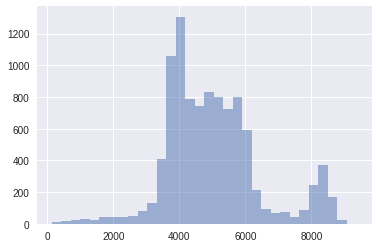

Attribute: Avg_monthly_household_cost (float64)
Mean: 52792.02507510147
Standard Deviation: 10448.91512461835


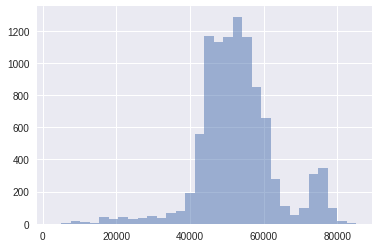

Attribute: Phone_minutes_10_years (float64)
Mean: 188555.17098973732
Standard Deviation: 123728.19951046497


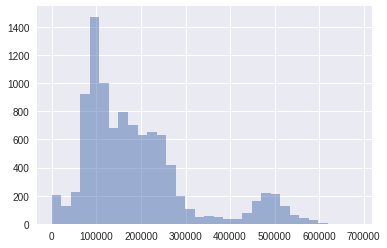

Attribute: Avg_size_per_room (float64)
Mean: 20.692248582795536
Standard Deviation: 2.85064967014484


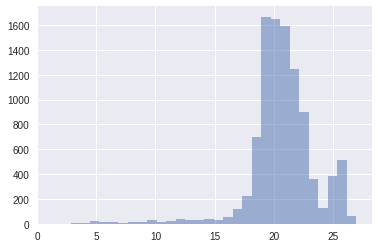

Attribute: Weighted_education_rank (float64)
Mean: 205.1534770931
Standard Deviation: 109.41804298735427


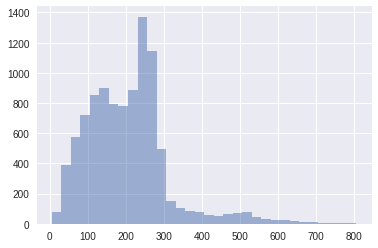

Attribute: X._satisfaction_financial_policy (float64)
Mean: 49.966199458043185
Standard Deviation: 29.008778246514847


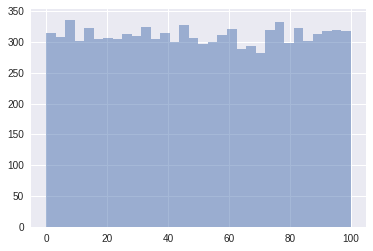

Attribute: Avg_monthly_income_all_years (float64)
Mean: 49580.231520756
Standard Deviation: 85147.49477952515


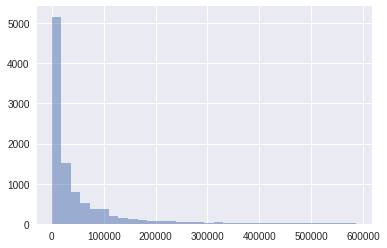

Attribute: Last_school_grades (float64)
Mean: 72.83727959697733
Standard Deviation: 20.308240888357528


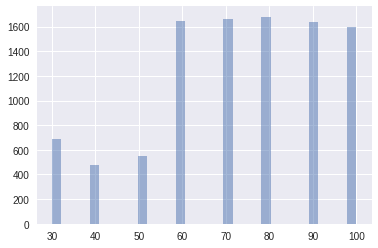

Attribute: Number_of_differnt_parties_voted_for (float64)
Mean: 2.001006643849406
Standard Deviation: 1.2539272820495724


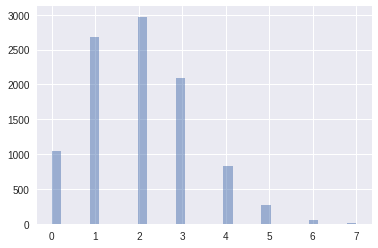

Attribute: Political_interest_Total_Score (float64)
Mean: 671.0192627657623
Standard Deviation: 126.44707896028257


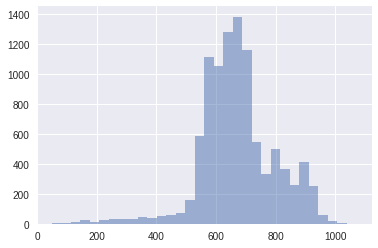

Attribute: Number_of_valued_Kneset_members (float64)
Mean: 9.660288045120355
Standard Deviation: 2.757765966160419


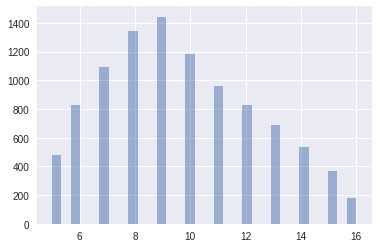

Attribute: Overall_happiness_score (float64)
Mean: 474.31440707182895
Standard Deviation: 108.87977367673102


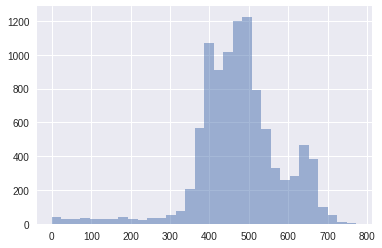

Attribute: Num_of_kids_born_last_10_years (float64)
Mean: 0.6642821158690176
Standard Deviation: 1.0479913038195763


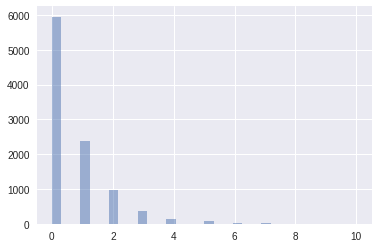

In [261]:
#let's look at the histogram of each attribute without missing values to see the spread of the values
#We look at attributes which are numberical values

for attribute in election_data.columns:
    if (election_data[attribute].dtype != object):
        print "Attribute: " + str(attribute) + " (" + str(election_data[attribute].dtype) + ")"
        print "Mean: " + str(election_data[attribute].mean())
        print "Standard Deviation: " + str(election_data[attribute].std())
        election_data[attribute].dropna().hist(bins=32, range= (election_data[attribute].min(),election_data[attribute].max()), alpha=0.5)
    P.show()

In [0]:
#Summary of insights about the data and the attributes type according to the histogramas :
# 1. Occupation_Satisfaction               - Can be converted to int64 type instead of float64
# 2. Avg_monthly_expense_when_under_age_21 - Has negative values which are incorrect that should be removed (expanse can't be negative)
# 3. AVG_lottary_expanses                  - Has negative values which are incorrect that should be removed (expanse can't be negative)
# 4. Avg_Satisfaction_with_previous_vote   - Has negative values which are incorrect that should be removed (satisfaction can't be negative)
# 5. Yearly_ExpensesK                      - Can be converted to int64 type instead of float64
# 6. Yearly_IncomeK                        - Has an outlier record of 822.07 that should be removed
# 7. Avg_monthly_household_cost            - Values below 10,000 can count as outlier records and should be removed
# 8. Avg_size_per_room                     - AVG room of less then 6m is really poor and count as outlier records and should be removed
# 9. Weighted_education_rank               - Values over 800 can count as outlier records and should be removed
# 10. Last_school_grades                   - Can be converted to int64 type instead of float64
# 11. Number_of_differnt_parties_voted_for - Can be converted to int64 type instead of float64
# 12. Political_interest_Total_Score       - Values below 130 can count as outlier records and should be removed
# 13. Number_of_valued_Kneset_members      - Can be converted to int64 type instead of float64
# 14. Num_of_kids_born_last_10_years       - Can be converted to int64 type instead of float64

## Initialization

In [0]:
#Save a copy of the dataset
original_election_data = election_data.copy()

#Define the label column and the column names and types as a dictionary
label_column_name = "Vote"
columns_dictionary = dict(election_data.dtypes)

#Extract the features according to their types
features = [feature_name for feature_name in columns_dictionary.keys() if feature_name != label_column_name]
categorical_features = [feature_name for feature_name, feature_type in columns_dictionary.iteritems() if feature_name != label_column_name and feature_type == "object"]
numerical_features = [feature_name for feature_name, feature_type in columns_dictionary.iteritems() if feature_name != label_column_name and feature_type != "object"]

In [264]:
# NOTE : the new data headers are a bit different:
## Financial_balance_score_.0.1.     instead of Financial_balance_score_(0-1)
## X.Of_Household_Income             instead of %Of_Household_Income 
## X.Time_invested_in_work           instead of %
## X._satisfaction_financial_policy  instead of %
uniform_features = ["Financial_balance_score_.0.1.",
                    "X.Of_Household_Income",
                    "Avg_government_satisfaction",
                    "Avg_education_importance",
                    "Avg_environmental_importance",
                    "Avg_Residancy_Altitude",
                    "Yearly_ExpensesK",
                    "X.Time_invested_in_work",
                    "X._satisfaction_financial_policy"]
discrete_features = ["Occupation_Satisfaction",
                     "Last_school_grades",
                     "Number_of_differnt_parties_voted_for",
                     "Number_of_valued_Kneset_members",
                     "Num_of_kids_born_last_10_years"]
gaussian_features = ["Avg_monthly_expense_when_under_age_21",
                     "AVG_lottary_expanses",
                     "Avg_Satisfaction_with_previous_vote",
                     "Garden_sqr_meter_per_person_in_residancy_area",
                     "Yearly_IncomeK",
                     "Avg_monthly_expense_on_pets_or_plants",
                     "Avg_monthly_household_cost",
                     "Phone_minutes_10_years",
                     "Avg_size_per_room",
                     "Weighted_education_rank",
                     "Avg_monthly_income_all_years",
                     "Political_interest_Total_Score",
                     "Overall_happiness_score"]

print categorical_features
print numerical_features

['Will_vote_only_large_party', 'Most_Important_Issue', 'Financial_agenda_matters', 'Age_group', 'Gender', 'Married', 'Voting_Time', 'Looking_at_poles_results', 'Main_transportation', 'Occupation']
['X.Of_Household_Income', 'Avg_Residancy_Altitude', 'Yearly_IncomeK', 'Number_of_valued_Kneset_members', 'Num_of_kids_born_last_10_years', 'AVG_lottary_expanses', 'IdentityCard_Num', 'Avg_monthly_household_cost', 'Occupation_Satisfaction', 'X.Time_invested_in_work', 'Avg_size_per_room', 'Overall_happiness_score', 'Financial_balance_score_.0.1.', 'Avg_monthly_income_all_years', 'Avg_education_importance', 'Garden_sqr_meter_per_person_in_residancy_area', 'Weighted_education_rank', 'Avg_monthly_expense_when_under_age_21', 'X._satisfaction_financial_policy', 'Phone_minutes_10_years', 'Political_interest_Total_Score', 'Yearly_ExpensesK', 'Avg_environmental_importance', 'Last_school_grades', 'Number_of_differnt_parties_voted_for', 'Avg_Satisfaction_with_previous_vote', 'Avg_government_satisfaction'

## Correlation Methods

In [0]:
import itertools

def linear_correlations(X, size=12):
    """
    Plots a graphical linear correlation matrix for every pair of features in the dataframe.
    
    X - A dataframe object
    size - Vertical and horizontal size of the plot
    """
    corr = X.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.grid()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    # adding heatmap scale
    cmap = matplotlib.cm.get_cmap('jet', 30)
    cax = ax.imshow(corr, interpolation="nearest", cmap=cmap)
    fig.colorbar(cax, ticks=np.arange(-1.0, 1.0, 0.1))
    
def polynomial_correlation_between_features(X, feature1, feature2):
    temp_data = X
    temp_data = temp_data.dropna(subset=[feature1, feature2], how='any')
    x = temp_data[feature1]
    y = temp_data[feature2]    
    poly_params = sp.polyfit(x, y, 2)
    yfit = poly_params[0]*(x**2)+poly_params[1]*(x**1)+poly_params[2]
    #print(yfit)
    yresid = y - yfit
    #print(yresid)
    SSresid = sum(pow(yresid,2))
    SStotal = len(y)* np.var(y)
    rsq = 1 - SSresid/SStotal    
    
    if rsq >= 0.7:
        print("Find polynomial correlations between: [%s] and [%s]" % (feature1, feature2))
        print("Polynom parameters = %s" % str(poly_params))
        print "RSQ = %s" % str(rsq)
        poly_2 = sp.poly1d(poly_params)
        xPoly = np.linspace(min(x), max(x), 100)  # Generate 100 x-coordinates from min(x) to max(x)
        yPoly = poly_2(xPoly)                     # Use the polynomial to calculate the y-coordinates
        P.plot(x, y,'o')
        P.plot(xPoly,yPoly,'r-')
        P.show()  

def polynomial_correlations(X, features):
    features_tuples = []
    lists = [sorted(f) for f in list(itertools.product(features, features))]
    for feature1, feature2 in lists:
        if feature1 != feature2:
            features_tuples.append((feature1, feature2))
    features_tuples = set(features_tuples)    
    for feature1, feature2 in features_tuples:
        polynomial_correlation_between_features(X, feature1, feature2)

## View Correlations Between Features

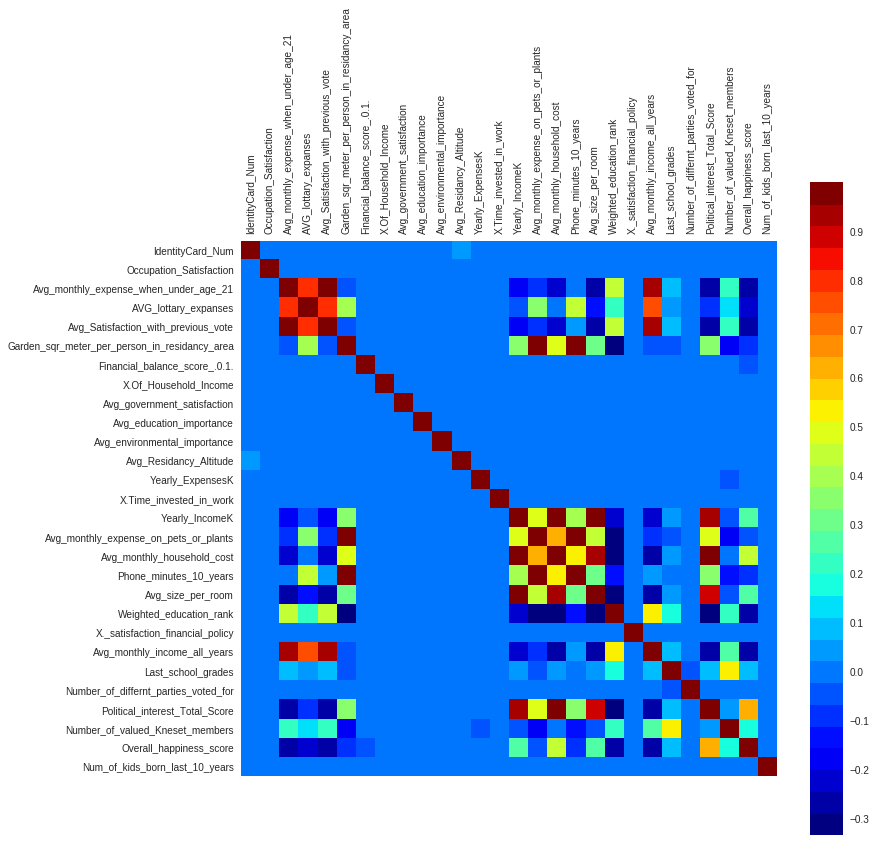

In [266]:
linear_correlations(election_data)

Find polynomial correlations between: [Garden_sqr_meter_per_person_in_residancy_area] and [Phone_minutes_10_years]
Polynom parameters = [ 1.00000000e+00  2.61997098e-14 -6.04784813e-11]
RSQ = 1.0


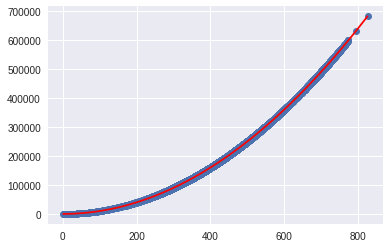

Find polynomial correlations between: [Avg_monthly_expense_on_pets_or_plants] and [Garden_sqr_meter_per_person_in_residancy_area]
Polynom parameters = [-1.03240901e-06  1.03974013e-01 -7.91535590e+01]
RSQ = 0.9818941906538775


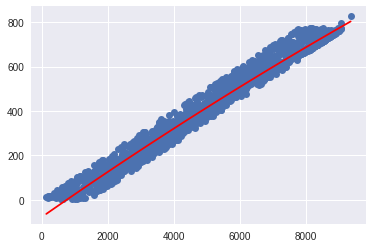

Find polynomial correlations between: [Avg_monthly_household_cost] and [Avg_size_per_room]
Polynom parameters = [-2.40107468e-09  5.06124540e-04  9.17760078e-01]
RSQ = 0.9039213667395134


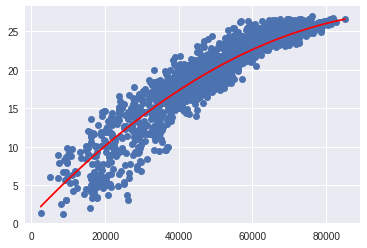

Find polynomial correlations between: [Avg_monthly_household_cost] and [Yearly_IncomeK]
Polynom parameters = [-6.07734684e-09  1.04315497e-02 -9.71597688e+01]
RSQ = 0.9226297248510226


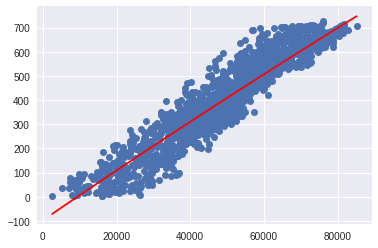

Find polynomial correlations between: [Avg_monthly_expense_when_under_age_21] and [Avg_monthly_income_all_years]
Polynom parameters = [ 0.11111111  0.33333333 10.        ]
RSQ = 1.0


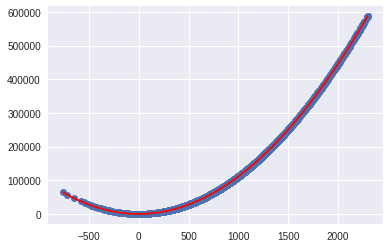

Find polynomial correlations between: [Avg_Satisfaction_with_previous_vote] and [Avg_monthly_expense_when_under_age_21]
Polynom parameters = [-8.94413688e-19  3.00000000e+00  1.09878030e-13]
RSQ = 1.0


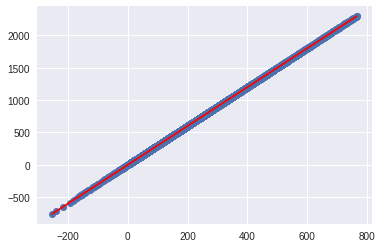

Find polynomial correlations between: [Avg_size_per_room] and [Yearly_IncomeK]
Polynom parameters = [1.00000000e+00 1.10052728e-14 1.77156736e-14]
RSQ = 1.0


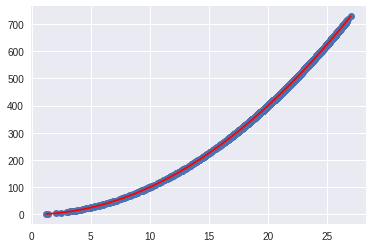

Find polynomial correlations between: [Avg_monthly_expense_on_pets_or_plants] and [Phone_minutes_10_years]
Polynom parameters = [ 7.19199499e-03  4.90541730e+00 -3.06421673e+04]
RSQ = 0.9817886071527343


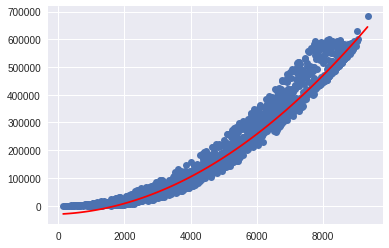

Find polynomial correlations between: [Political_interest_Total_Score] and [Yearly_IncomeK]
Polynom parameters = [ 1.43046429e-04  5.85303037e-01 -2.32086257e+01]
RSQ = 0.8348543680052619


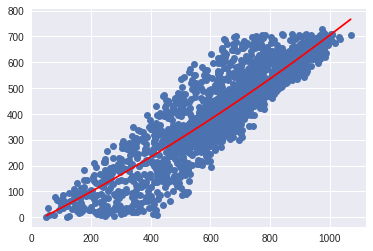

Find polynomial correlations between: [Avg_size_per_room] and [Political_interest_Total_Score]
Polynom parameters = [1.07713166e+00 1.35282404e-01 1.98380579e+02]
RSQ = 0.8325071223904891


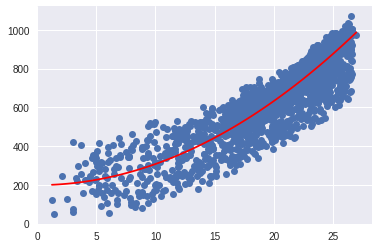

Find polynomial correlations between: [Avg_Satisfaction_with_previous_vote] and [Avg_monthly_income_all_years]
Polynom parameters = [ 1.  1. 10.]
RSQ = 1.0


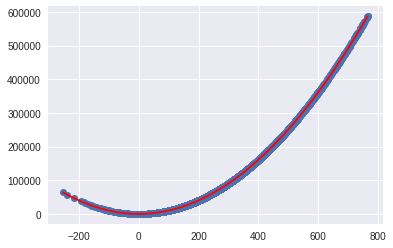

Find polynomial correlations between: [Avg_monthly_household_cost] and [Political_interest_Total_Score]
Polynom parameters = [-3.45915452e-08  1.53796447e-02 -4.10669260e+01]
RSQ = 0.9495123594981884


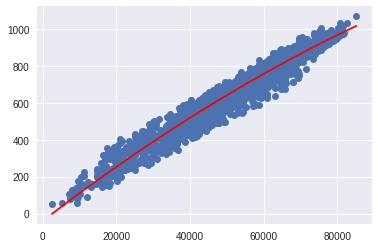

In [267]:
polynomial_correlations(election_data, numerical_features)

In [0]:
#Summary of insights about the correlations between the features

#Linear correlations (Most significance): (We look under the brown line)
# 1. Avg_Satisfaction_with_previous_vote / Avg_monthly_expense_when_under_age_21
# 2. Avg_monthly_expense_on_pets_or_plants / Garden_sqr_meter_per_person_in_residancy_area
# 3. Avg_monthly_household_cost / Yearly_IncomeK
# 4. Phone_minutes_10_years / Garden_sqr_meter_per_person_in_residancy_area
# 5. Phone_minutes_10_years / Avg_monthly_expense_on_pets_or_plants
# 6. Avg_size_per_room / Yearly_IncomeK
# 7. Avg_size_per_room / Avg_monthly_household_cost
# 8. Avg_monthly_income_all_years / Avg_monthly_expense_when_under_age_21
# 9. Avg_monthly_income_all_years / Avg_Satisfaction_with_previous_vote
# 10. Political_interest_Total_Score / Yearly_IncomeK
# 11. Political_interest_Total_Score / Avg_monthly_household_cost
# 12. Political_interest_Total_Score / Avg_size_per_room

#Polynomial correlations (Most significance):
# 1. Yearly_IncomeK / Avg_size_per_room
# 2. Avg_monthly_expense_when_under_age_21 / Avg_Satisfaction_with_previous_vote
# 3. Avg_monthly_income_all_years / Avg_monthly_expense_when_under_age_21
# 4. Avg_monthly_income_all_years / Avg_Satisfaction_with_previous_vote
# 5. Phone_minutes_10_years / Garden_sqr_meter_per_person_in_residancy_area

## Set the correct type of each attribute 

In [0]:
def convert_discrete_features_datatype(X, discrete_features):
    """
    Convert the discrete feature datatype to int from float.
    The data frame could not contain any NaN values, therefore 
    this step should be activated after the Imputation step.
    
    X - the compleate data frame
    discrete_features - list of discrete features to convert their type
    """
    for feature in discrete_features:
        X[feature] = X[feature].astype(int)
    return X
    

#Set the correct type of discrete features to int64 instead of float64
#NaN values should be filled up before the conversion (continue to Imputation)
#convert_discrete_features_datatype(election_data, discrete_features)

# Imputation

## Categorical and Numerical Features Imputers

In [0]:
from knnimpute import (knn_impute_few_observed, 
                       knn_impute_with_argpartition, 
                       knn_impute_optimistic,
                       knn_impute_reference)

#slected_categorical_features = ['Will_vote_only_large_party', 'Most_Important_Issue']


# this takes the label into account. in the new Data we don't have the label...
class CategoricalImputer(object):
    def __init__(self, X, label, categorical_features):
        """
        Impute missing values for categorical features by the label of the sample
        and selecting the most frequent value for that label group.
        
        This imputer doesn't handle features other of type object, and it can 
        handle a single feature imputation or multiple object typed features which 
        it retrives on its own.
        """        
        self.X = X
        self.label = label
        self.categorical_features = categorical_features
    
    def fit(self, x):
        return x.value_counts().index[0]
    
    def transform(self, x):
        return x.fillna(self.fit(x))
        
# this takes the label into account. in the new Data we don't have the label, so we changed the label to the correlated feature.
    def fit_transform_label(self):
        #for feature in self.categorical_features:
        self.data_frame = self.X[[self.label, self.categorical_features]]
        self.X.loc[:,(self.categorical_features)] = self.data_frame.groupby(self.label)[self.categorical_features].apply(lambda x: self.transform(x))
        return self.X
    
# this DOES NOT takes the label into account    TODO:   CHECK!!!
    def fit_transform(self):
        for feature in self.categorical_features:
          #if(feature in slected_categorical_features):
          #  
          #  if (feature == 'Will_vote_only_large_party'):
          #    self.data_frame = self.X[['Looking_at_poles_results', feature]]
          #    # this is for replaceing the "-1" values with NaN (so that fillna will work..)
          #    #self.data_frame = self.data_frame['Will_vote_only_large_party'].apply(lambda x: np.nan if x < 0 else x)
          #    self.X.loc[:,(feature)] = self.data_frame.groupby('Looking_at_poles_results')[feature].apply(lambda x: self.transform(x))
          #  
          #  elif (feature == 'Most_Important_Issue'):
          #    self.data_frame = self.X[['Last_school_grades', feature]]
          #    # this is for replaceing the "-1" values with NaN (so that fillna will work..)
          #    #self.data_frame = self.data_frame['Most_Important_Issue'].apply(lambda x: np.nan if x < 0 else x)
          #    self.X.loc[:,(feature)] = self.data_frame.groupby('Last_school_grades')[feature].apply(lambda x: self.transform(x))
          #  
          #else:
          self.data_frame = self.X[feature]
          # this is for replaceing the "-1" values with NaN (so that fillna will work..)
          self.data_frame = self.data_frame.apply(lambda x: np.nan if x < 0 else x)
          self.X.loc[:,(feature)] = self.data_frame.fillna(self.data_frame.value_counts().index[0])
        return self.X
                
    
class NumericalKNNImputer(object):
    def __init__(self, X, strategy, k):
        """
        Impute missing values for numerical features by the strategy provided 
        as arguments.
        
        This imputer must receive numerical data
        """
        self.k = k
        self.data = X
        self.strategy = strategy
        if self.strategy == "optimistic":
            self.impute_function = knn_impute_optimistic
        elif self.strategy == "few_observed":
            self.impute_function = knn_impute_few_observed
        elif self.strategy == "argpartition":
            self.impute_function = knn_impute_with_argpartition
        elif self.strategy == "reference":
            self.impute_function = knn_impute_reference
        else:
            raise NotImplementedError
    
    def fit_transform(self):
        return self.impute_function(self.data, np.isnan(self.data), self.k)        

## Data Conversion

In [0]:
def convert_categorical_features(X, categorical_features):
    """
    Convert the data object feature to numerical/boolean features for imputation
    
    X - the compleate data frame
    categorical_features - list of categorical features to convert their type
    """
    for feature in categorical_features:
        X[feature] = X[feature].astype("category")
        X[feature] = X[feature].cat.codes
    return X

In [273]:
election_data = convert_categorical_features(election_data, categorical_features)
election_data.head()

,IdentityCard_Num,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Most_Important_Issue,Avg_Satisfaction_with_previous_vote,Looking_at_poles_results,Garden_sqr_meter_per_person_in_residancy_area,Married,Gender,...,Last_school_grades,Age_group,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Main_transportation,Occupation,Overall_happiness_score,Num_of_kids_born_last_10_years,Financial_agenda_matters
0,1,7.0,582.651672,66991.659036,4,194.217224,0,344.931606,1,1,...,80.0,0,1.0,625.634107,8.0,3,0,431.549112,1.0,1
1,2,10.0,537.035136,63581.712944,5,179.011712,0,355.181861,1,1,...,30.0,2,1.0,654.399891,6.0,2,3,409.504666,1.0,1
2,3,2.0,1177.671432,135095.166133,1,392.557144,1,344.141403,1,1,...,90.0,0,4.0,847.663392,14.0,0,1,549.970750,0.0,1
3,4,5.0,153.925755,17691.033625,2,51.308585,0,344.796755,1,1,...,60.0,0,1.0,604.064140,5.0,3,3,426.148106,2.0,0
4,5,5.0,-138.081083,-7442.378739,1,-46.027028,1,161.695836,1,1,...,90.0,0,2.0,821.153302,15.0,3,2,615.907352,0.0,1


### Before filling up

In [276]:
election_data.dtypes
print "Data contains missing values: %s" % election_data.isnull().values.any()

Data contains missing values: True


## Filling up missing values

In [0]:
#Filling up missing values
election_data_backup = election_data.copy()

### Observe the Selected Categorial Features:

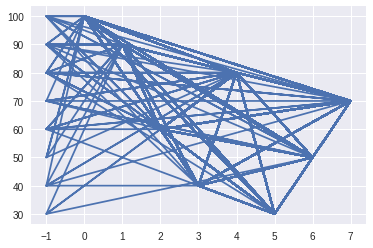

In [279]:
P.plot( election_data['Most_Important_Issue'], election_data['Last_school_grades'])

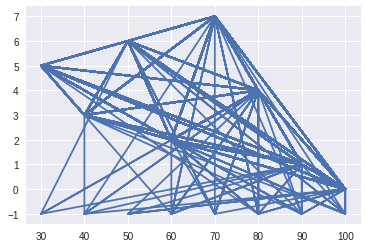

In [280]:
P.plot(  election_data['Last_school_grades'], election_data['Most_Important_Issue'])

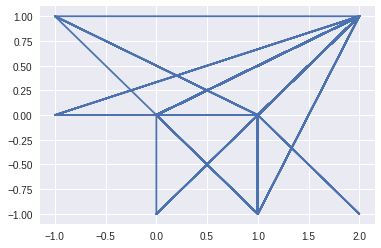

In [281]:
P.plot( election_data['Will_vote_only_large_party'], election_data['Looking_at_poles_results'])

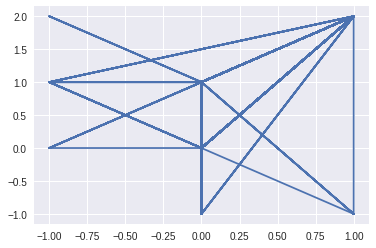

In [282]:
P.plot(  election_data['Looking_at_poles_results'], election_data['Will_vote_only_large_party'])

### Handle Categorical Features

In [285]:
slected_categorical_features_imputed_list=[]

for slected_categorical_feature, correlated  in zip(['Will_vote_only_large_party', 'Most_Important_Issue'], ['Looking_at_poles_results', 'Last_school_grades']):
  print 'imputing values of #' + slected_categorical_feature + '# \t using the correlated feature: #' + correlated
  slected_categorical_feature_with_correlated = [slected_categorical_feature, correlated]
  slected_categorical_feature_with_correlated_data = election_data[slected_categorical_feature_with_correlated]
  slected_categorical_features_imputed_list.append(CategoricalImputer(slected_categorical_feature_with_correlated_data, correlated, slected_categorical_feature).fit_transform_label())

imputing values of #Will_vote_only_large_party# 	 using the correlated feature: #Looking_at_poles_results
imputing values of #Most_Important_Issue# 	 using the correlated feature: #Last_school_grades


In [0]:
slected_categorical_features_imputed = pd.DataFrame(data=slected_categorical_features_imputed_list[0], columns=['Will_vote_only_large_party'])
slected_categorical_features_imputed = slected_categorical_features_imputed.join(pd.DataFrame(data=slected_categorical_features_imputed_list[1], columns=['Most_Important_Issue']))

In [287]:
slected_categorical_features_imputed.head()

,Will_vote_only_large_party,Most_Important_Issue
0,1,4.0
1,0,5.0
2,2,1.0
3,1,2.0
4,2,1.0


In [288]:
#Handle categorical features imputation - WITHOUT label..
categorical_election_data = election_data[categorical_features]
categorical_election_data['Most_Important_Issue'] = slected_categorical_features_imputed['Most_Important_Issue']
categorical_election_data['Will_vote_only_large_party'] = slected_categorical_features_imputed['Will_vote_only_large_party']
categorical_election_data_imputed = CategoricalImputer(categorical_election_data, None, categorical_features).fit_transform()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [289]:
categorical_election_data_imputed.isnull().values.any()

False

In [0]:
categorical_election_data = categorical_election_data_imputed

### Handle Numerical Features

In [0]:
#Handle numerical features imputation - NOTE: WITHOUT LABEL
#numerical_features_with_label = numerical_features + [label_column_name]

numerical_election_data_matrix = election_data[numerical_features].as_matrix()

knn_imputers_models = ["optimistic", "few_observed", "argpartition", "reference"]

'''
imputed_election_data_dict = {}
mean_absolute_difference_dict = {}

for model in knn_imputers_models:
    imputed_election_data_dict[model] = NumericalKNNImputer(election_data_matrix, model, 5).fit_transform()
    mean_absolute_difference_dict[model] = np.mean(np.abs(imputed_election_data_dict[model] - election_data_matrix))
    print "KKN Imputer - Model: %s - Mean absolute difference: %0.5f" % (model, mean_absolute_difference_dict[model])
'''

numerical_election_data = pd.DataFrame(data=NumericalKNNImputer(numerical_election_data_matrix, knn_imputers_models[0], 5).fit_transform(), columns=numerical_features)
numerical_election_data.head()

In [293]:
#numerical_features_with_label = numerical_features + [label_column_name]
print categorical_election_data.shape
print numerical_election_data.shape

election_data = categorical_election_data[categorical_features].join(numerical_election_data)
print 'contains NaN? : ' + str(election_data.isnull().values.any())
election_data.head()

(10000, 10)
(10000, 28)
contains NaN? : False


,Will_vote_only_large_party,Most_Important_Issue,Financial_agenda_matters,Age_group,Gender,Married,Voting_Time,Looking_at_poles_results,Main_transportation,Occupation,...,X._satisfaction_financial_policy,Phone_minutes_10_years,Political_interest_Total_Score,Yearly_ExpensesK,Avg_environmental_importance,Last_school_grades,Number_of_differnt_parties_voted_for,Avg_Satisfaction_with_previous_vote,Avg_government_satisfaction,Avg_monthly_expense_on_pets_or_plants
0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,...,76.594424,124474.372828,625.634107,8778.0,2.609707,80.0,1.0,194.217224,9.390153,4283.463599
1,0.0,5.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0,...,1.828764,126154.154143,654.399891,3640.0,7.775889,30.0,1.0,179.011712,7.846030,4472.106100
2,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,31.841291,118433.304945,847.663392,6338.0,3.561606,90.0,4.0,392.557144,8.228669,4637.555974
3,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,...,84.297860,118884.802369,604.064140,6758.0,8.355614,60.0,1.0,51.308585,3.240424,4240.212910
4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,...,88.847039,26145.543462,821.153302,5035.0,7.799176,90.0,2.0,-46.027028,8.314673,2721.469569


### After filling up

In [294]:
election_data.dtypes
print "Data contains missing values: %s" % election_data.isnull().values.any()

Data contains missing values: False


#### verify again that the correlation between features haven't ruined - After Imputation

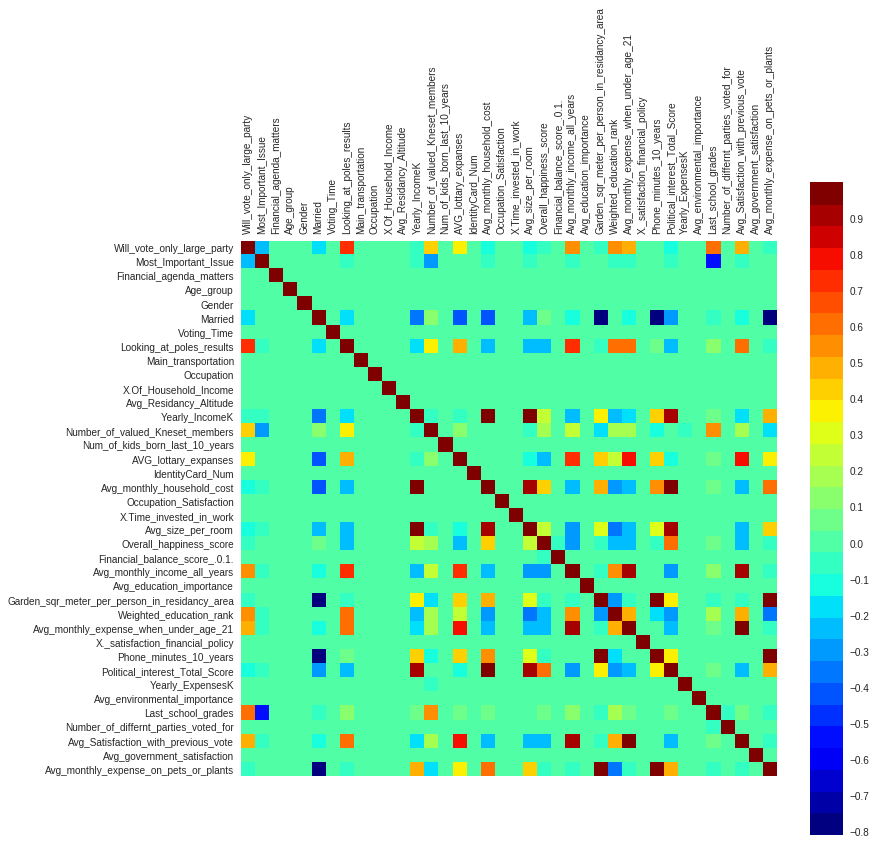

In [304]:
linear_correlations(election_data)

# Data Cleansing
#### We gave up this step, but we've considered deleting the OUTLIERS and IMPUTE of the same data again.

# Type/Value modification

In [307]:
# 1-Hot for categorical features
from sklearn.preprocessing import OneHotEncoder

def create_categorical_feature_one_hot(X, categorical_features):
    for feature in categorical_features:
        for value in X[feature].unique():
            new_one_hot_feature = "%s_%s" % (feature, value)
            X.loc[:,(new_one_hot_feature)] = X[feature].apply(lambda sample_value: int(value == sample_value))        
        X = X.drop(feature, axis=1)
    return X
            
election_data.dtypes

Will_vote_only_large_party                       float64
Most_Important_Issue                             float64
Financial_agenda_matters                         float64
Age_group                                        float64
Gender                                           float64
Married                                          float64
Voting_Time                                      float64
Looking_at_poles_results                         float64
Main_transportation                              float64
Occupation                                       float64
X.Of_Household_Income                            float64
Avg_Residancy_Altitude                           float64
Yearly_IncomeK                                   float64
Number_of_valued_Kneset_members                  float64
Num_of_kids_born_last_10_years                   float64
AVG_lottary_expanses                             float64
IdentityCard_Num                                 float64
Avg_monthly_household_cost     

# Normalization (scaling) 

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

class Normalizer(object):
    def __init__(self):
        return
        
    def min_max_normalization(self, X, uniform_features):
        """
        Normalize uniform distribution features in the data
        
        X - Data set
        uniform_features - List of uniform features
        """
        scaler = MinMaxScaler(feature_range=(-1, 1), copy=True)
        dataset = X.copy()
        for feature in uniform_features:
            dataset[feature] = scaler.fit_transform(dataset[feature].values.reshape(-1, 1))
        return dataset
    
    def z_score_normalization(self, X, gaussian_features):
        """
        Normalize gaussian distribution features in the data
        
        X - Data set
        gaussian_features - List of gaussian features
        """
        scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
        dataset = X.copy()
        for feature in gaussian_features:
            dataset[feature] = scaler.fit_transform(dataset[feature].values.reshape(-1, 1))
        return dataset

In [309]:
normalizer = Normalizer()
normalized_election_data = normalizer.min_max_normalization(election_data, uniform_features)
normalized_election_data = normalizer.z_score_normalization(normalized_election_data, gaussian_features)
election_data = normalized_election_data
election_data.head()

,Will_vote_only_large_party,Most_Important_Issue,Financial_agenda_matters,Age_group,Gender,Married,Voting_Time,Looking_at_poles_results,Main_transportation,Occupation,...,X._satisfaction_financial_policy,Phone_minutes_10_years,Political_interest_Total_Score,Yearly_ExpensesK,Avg_environmental_importance,Last_school_grades,Number_of_differnt_parties_voted_for,Avg_Satisfaction_with_previous_vote,Avg_government_satisfaction,Avg_monthly_expense_on_pets_or_plants
0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,...,0.531922,-0.519119,-0.358104,0.650807,-0.478154,80.0,1.0,0.176517,0.878544,-0.492843
1,0.0,5.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,3.0,...,-0.963507,-0.505535,-0.130510,-0.817402,0.555154,30.0,1.0,0.071124,0.569628,-0.362680
2,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,-0.363210,-0.567972,1.398582,-0.046435,-0.287761,90.0,4.0,1.551261,0.646178,-0.248521
3,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,...,0.686002,-0.564321,-0.528765,0.073582,0.671108,60.0,1.0,-0.814019,-0.351766,-0.522685
4,2.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,3.0,2.0,...,0.776993,-1.314277,1.188835,-0.418774,0.559812,90.0,2.0,-1.488676,0.663384,-1.570611


# choose only the selected important features from the data

In [0]:
selected_features = ['Number_of_valued_Kneset_members', 'Yearly_IncomeK', 'Overall_happiness_score', 'Avg_Satisfaction_with_previous_vote', 
'Most_Important_Issue', 'Will_vote_only_large_party', 
'Garden_sqr_meter_per_person_in_residancy_area', 'Weighted_education_rank']

In [313]:
election_data_selected_features = election_data[np.append(['IdentityCard_Num'], selected_features)]
election_data_selected_features.head()

,IdentityCard_Num,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Most_Important_Issue,Will_vote_only_large_party,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank
0,1.0,8.0,-0.178662,-0.393790,0.176517,4.0,1.0,-0.498407,-0.149912
1,2.0,6.0,0.225238,-0.596577,0.071124,5.0,0.0,-0.422856,-0.271918
2,3.0,14.0,1.518685,0.695575,1.551261,1.0,2.0,-0.504231,-0.130677
3,4.0,5.0,-0.375136,-0.443474,-0.814019,2.0,1.0,-0.499401,-0.039032
4,5.0,15.0,1.089040,1.302127,-1.488676,1.0,2.0,-1.848972,1.429066


# Convert Categorical Feature to OneHot

In [314]:
selected_categorical_features = []
for feature in categorical_features:
    if feature in selected_features:
        selected_categorical_features.append(feature)
        
print selected_categorical_features

['Will_vote_only_large_party', 'Most_Important_Issue']


In [315]:
for feature in selected_categorical_features:
  print election_data_selected_features[feature].head()

0    1.0
1    0.0
2    2.0
3    1.0
4    2.0
Name: Will_vote_only_large_party, dtype: float64
0    4.0
1    5.0
2    1.0
3    2.0
4    1.0
Name: Most_Important_Issue, dtype: float64


In [0]:
# 1-Hot for categorical features
from sklearn.preprocessing import OneHotEncoder

def create_categorical_feature_one_hot(X, categorical_features):
    for feature in categorical_features:
        for value in X[feature].unique():
            new_one_hot_feature = "%s_%s" % (feature, value)
            X.loc[:,(new_one_hot_feature)] = X[feature].apply(lambda sample_value: int(value == sample_value))        
        X = X.drop(feature, axis=1)
    return X

In [317]:
election_data_selected_features_one_hot = create_categorical_feature_one_hot(election_data_selected_features, selected_categorical_features)
print election_data_selected_features_one_hot.dtypes
election_data_selected_features_one_hot.head()

IdentityCard_Num                                 float64
Number_of_valued_Kneset_members                  float64
Yearly_IncomeK                                   float64
Overall_happiness_score                          float64
Avg_Satisfaction_with_previous_vote              float64
Garden_sqr_meter_per_person_in_residancy_area    float64
Weighted_education_rank                          float64
Will_vote_only_large_party_1.0                     int64
Will_vote_only_large_party_0.0                     int64
Will_vote_only_large_party_2.0                     int64
Most_Important_Issue_4.0                           int64
Most_Important_Issue_5.0                           int64
Most_Important_Issue_1.0                           int64
Most_Important_Issue_2.0                           int64
Most_Important_Issue_0.0                           int64
Most_Important_Issue_3.0                           int64
Most_Important_Issue_7.0                           int64
Most_Important_Issue_6.0       

,IdentityCard_Num,Number_of_valued_Kneset_members,Yearly_IncomeK,Overall_happiness_score,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Weighted_education_rank,Will_vote_only_large_party_1.0,Will_vote_only_large_party_0.0,Will_vote_only_large_party_2.0,Most_Important_Issue_4.0,Most_Important_Issue_5.0,Most_Important_Issue_1.0,Most_Important_Issue_2.0,Most_Important_Issue_0.0,Most_Important_Issue_3.0,Most_Important_Issue_7.0,Most_Important_Issue_6.0
0,1.0,8.0,-0.178662,-0.393790,0.176517,-0.498407,-0.149912,1,0,0,1,0,0,0,0,0,0,0
1,2.0,6.0,0.225238,-0.596577,0.071124,-0.422856,-0.271918,0,1,0,0,1,0,0,0,0,0,0
2,3.0,14.0,1.518685,0.695575,1.551261,-0.504231,-0.130677,0,0,1,0,0,1,0,0,0,0,0
3,4.0,5.0,-0.375136,-0.443474,-0.814019,-0.499401,-0.039032,1,0,0,0,0,0,1,0,0,0,0
4,5.0,15.0,1.089040,1.302127,-1.488676,-1.848972,1.429066,0,0,1,0,0,1,0,0,0,0,0


# Download the New Data - after Preperation!

In [0]:
election_data_selected_features_one_hot.to_csv("ElectionsData_Pred_Features_selected_features_after_preperation_one_hot.csv", index=False)

In [319]:
!ls

BAK
datalab
ElectionsData_Pred_Features.csv
ElectionsData_Pred_Features_selected_features_after_preperation_one_hot.csv


In [0]:
from google.colab import files
files.download('ElectionsData_Pred_Features_selected_features_after_preperation_one_hot.csv')

# References

In [0]:
#          - https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html
#          - http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
#          - https://www.datacamp.com/community/tutorials/machine-learning-python
#          - http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py
#          - https://github.com/EpistasisLab/scikit-rebate
#          - http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
#          - http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
#          - http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
#          - https://github.com/hammerlab/fancyimpute/blob/master/README.md
#          - https://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html
#          - http://pbpython.com/categorical-encoding.html
#          - https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
#          - https://github.com/rasbt/mlxtend
#          - http://blog.datadive.net/selecting-good-features-part-i-univariate-selection/
#          - http://blog.datadive.net/selecting-good-features-part-i-univariate-selection/
#          - https://stackoverflow.com/questions/15796247/find-important-features-for-classification
#          - http://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html#sphx-glr-auto-examples-svm-plot-svm-anova-py
#          - https://github.com/alki22/Feature-Selection
#          - https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html
#          - http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
#          - https://www.datacamp.com/community/tutorials/machine-learning-python
#          - http://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html#sphx-glr-auto-examples-ensemble-plot-feature-transformation-py